# Rainfall data and drought analysis

In this notebook the drought in Burkina Faso will be analysed. This is done by two drought indicators: Dry-spells and SPI. The dry-spells is used for irrigation purposed, while SPI gives a global overview of drought during a whole year and is an index based on the probability of precipitation for any time scale. Both are only based on precipitation and nothing else. 

In [1]:
#importing functions
%matplotlib inline 
import glob
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
from datetime import timedelta
import scipy.stats as stats
import os
path = os.getcwd()
home_path = os.path.dirname(os.path.dirname(path))
gis_folder = f'{home_path}\\QGIS project'

In [2]:
glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv')

['C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Black Volta_-2.75_9.55.csv',
 'C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Lake Volta_0.05_6.45.csv',
 'C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Mouhoun_-3.95_12.05.csv',
 'C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Nakambe_-2.15_13.55.csv',
 'C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Oti_0.15_8.45.csv',
 'C:\\Users\\sophi\\Volta-burkina-faso\\data\\Volta_precip_latest\\Pendjari_1.15_11.15.csv']

In [3]:
#loading data 
lst_dfs = []
for path in glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv'):
    print(path)
    df_input = pd.read_csv(path, parse_dates = [0], delimiter = ',', index_col=[0],skiprows=1,
                  skipinitialspace = True, header = None, usecols=[0,1], names = ['Date','precipitation'])
    
    lst_dfs.append(df_input)

C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Black Volta_-2.75_9.55.csv
C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Lake Volta_0.05_6.45.csv
C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Mouhoun_-3.95_12.05.csv
C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Nakambe_-2.15_13.55.csv
C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Oti_0.15_8.45.csv
C:\Users\sophi\Volta-burkina-faso\data\Volta_precip_latest\Pendjari_1.15_11.15.csv


In [4]:
names_col = ['Black_volta', 'Lake_Volta', 'Mouhoun', 'Nakambe', 'Oti', 'Penjari'] 
Rainfall_data = pd.concat(lst_dfs, axis = 1,  keys = names_col,ignore_index=False)
# Rainfall_data.columns = Rainfall_data.columns.droplevel(level=1)
Rainfall_data

,Black_volta,Lake_Volta,Mouhoun,Nakambe,Oti,Penjari
,precipitation,precipitation,precipitation,precipitation,precipitation,precipitation
Date,,,,,,
1979-01-01,0.0,0.00,0.0,0.0,0.0,0.0
1979-01-02,0.0,0.00,0.0,0.0,0.0,0.0
1979-01-03,0.0,0.00,0.0,0.0,0.0,0.0
1979-01-04,0.0,0.00,0.0,0.0,0.0,0.0
1979-01-05,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2017-10-27,0.0,0.00,0.0,0.0,0.0,0.0
2017-10-28,0.0,3.83,0.0,0.0,0.0,0.0


In [5]:
#making dataframe smaller to 2014-
Rainfall_data_2014 = Rainfall_data.loc['2014-01-01':, :]
Rainfall_data_2014.head()

,Black_volta,Lake_Volta,Mouhoun,Nakambe,Oti,Penjari
,precipitation,precipitation,precipitation,precipitation,precipitation,precipitation
Date,,,,,,
2014-01-01,0.04,0.0,0.0,0.0,0.0,0.0
2014-01-02,0.00,0.0,0.0,0.0,0.0,0.0
2014-01-03,0.00,0.0,0.0,0.0,0.0,0.0
2014-01-04,0.00,0.0,0.0,0.0,0.0,0.0
2014-01-05,0.00,0.0,0.0,0.0,0.0,0.0


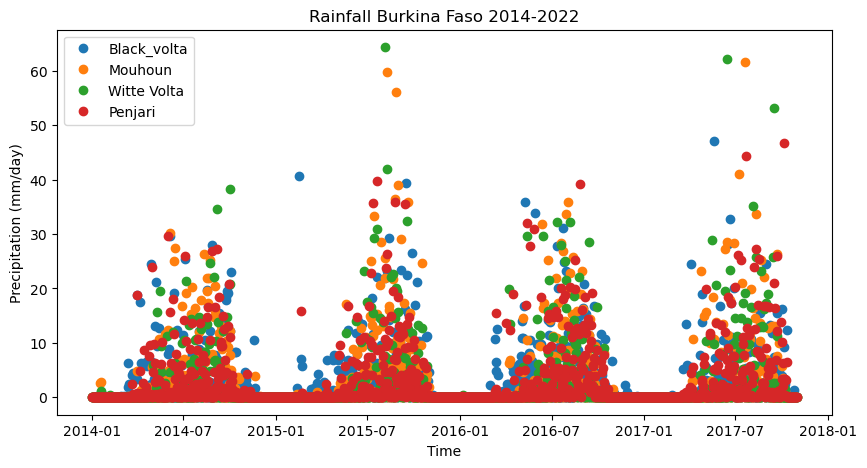

In [28]:
#plotting data from 2014 - 2017, for the regions that matter 
plt.figure(figsize=(10,5))
plt.plot(Rainfall_data_2014.loc[:, 'Black_volta'], 'o', label = 'Black_volta')
plt.plot(Rainfall_data_2014.loc[:, 'Mouhoun'], 'o', label = 'Mouhoun',)
plt.plot(Rainfall_data_2014.loc[:, 'Nakambe'], 'o', label = 'Witte Volta')
plt.plot(Rainfall_data_2014.loc[:, 'Penjari'], 'o', label = 'Penjari')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Rainfall Burkina Faso 2014-2022');
plt.legend();

Notes: 
- Rainfall has become more extreme 
- high seasonality: dry and wet season 
- High peaks and low lows 
- Maxima are around 50 to 60 mm/day

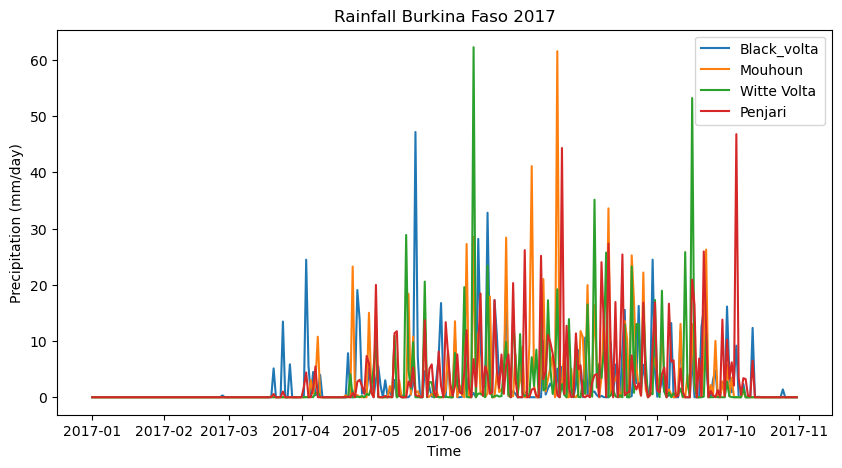

In [29]:
#plotting data in 2017
plt.figure(figsize=(10,5))
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2022-12-31', 'Black_volta'], label = 'Black_volta')
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2022-12-31', 'Mouhoun'], label = 'Mouhoun')
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2022-12-31', 'Nakambe'], label = 'Witte Volta')
plt.plot(Rainfall_data_2014.loc['2017-01-01':'2022-12-31', 'Penjari'], label = 'Penjari')
plt.title('Rainfall Burkina Faso 2017')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.legend();

Notes: 
- Very dry season from october untill may  
- Wet season from may to october 

,Black_volta,Mouhoun,Nakambe,Penjari
,precipitation,precipitation,precipitation,precipitation
Date,,,,
1979-01-31,0.07,0.00,0.00,0.00
1979-02-28,0.19,0.00,0.00,0.00
1979-03-31,34.61,16.96,1.08,21.70
1979-04-30,67.99,6.50,1.10,30.42
1979-05-31,153.06,106.28,36.68,81.21
...,...,...,...,...
2017-06-30,169.74,149.20,136.69,145.87
2017-07-31,50.46,217.97,146.42,201.37


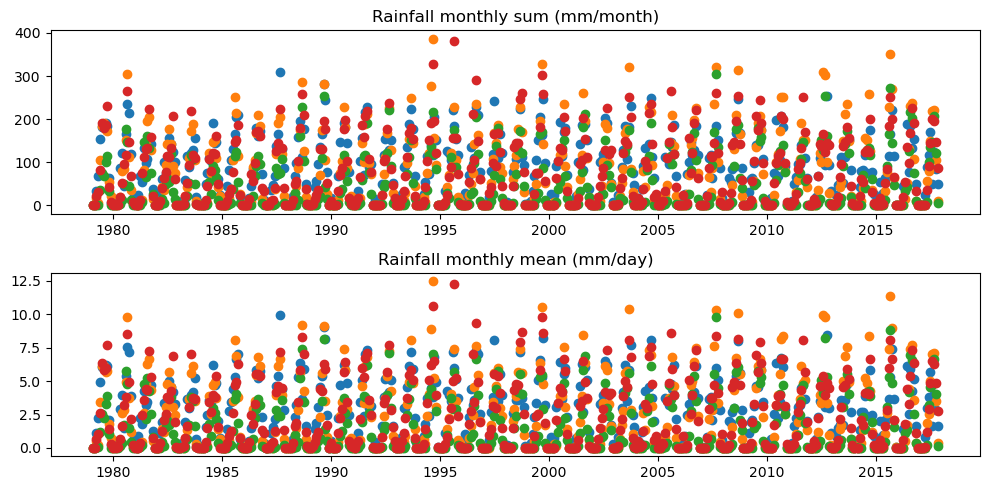

In [30]:
# sorting to only B.F 
Rainfall_sorted_BF = Rainfall_data.loc[:,['Black_volta','Mouhoun', 'Nakambe', 'Penjari']] 
Rainfall_BF_msum = Rainfall_sorted_BF.resample('M').sum()
Rainfall_BF_mmean = Rainfall_sorted_BF.resample('M').mean()

#plotting monthly sum and mean 
plt.figure(figsize= (10,5))

plt.subplot(2, 1, 1)
plt.title('Rainfall monthly sum (mm/month)')
plt.plot(Rainfall_BF_msum, 'o')
plt.subplot(2, 1, 2)
plt.title('Rainfall monthly mean (mm/day)')
plt.plot(Rainfall_BF_mmean, 'o')
plt.tight_layout();
Rainfall_BF_msum

In [31]:
# resample yearly
Rainfall_BF_ysum = Rainfall_sorted_BF.resample('Y').sum()
Rainfall_BF_ymean = Rainfall_sorted_BF.resample('Y').mean()
Rainfall_BF_ysum.head()

,Black_volta,Mouhoun,Nakambe,Penjari
,precipitation,precipitation,precipitation,precipitation
Date,,,,
1979-12-31,1069.38,930.26,434.94,974.08
1980-12-31,1053.85,805.48,451.37,777.55
1981-12-31,803.13,793.83,619.00,870.22
1982-12-31,901.95,812.37,350.31,821.59
1983-12-31,722.62,654.53,352.77,618.17


Notes: 
- rainfall sum is extremely high 
- monthly mean is also high, but seems less extreme 

### Drought indicator : Dry spells

For now I chose to calculate the dry spells. In the case of Burkina Faso, where most of the land is used vor agricultural purposes, it is relevant to know what the rate of occurence is of a dry spell of a particular critical lenghts. It didn't really make sense to calculate the potential rainfall deficit, as the potential evaporation is always high, but the rainfall is very period dependent. Growing season in Burkina Faso is between May and November. For the minimum precipitation a value of 6mm is used. This followd from https://idl-bnc-idrc.dspacedirect.org/bitstream/handle/10625/52227/IDL-52227.pdf. See the annexes for more information. 

In [10]:
def spells(df, StartMonth, DayNum, Day = 1, lim = 6):
        '''This function calculates the dry spells for a growing season. A dry spell is indexed on its last day.
        Note: This function does not support a growth season in different calendar years.
        
        :: Inputs ::
        StartMonth: int. The month in which the crop starts growing
        DayNum: Length of the growing season in days
        Day: Starting day within the StartMonth. Standard is 1
        lim: Minimum precipitation for what constitutes a wet day in mm/day.
        
        :: Outputs :: 
        ds: DataFrame with dry spells
        
        :: Jeremy Trotereau (2020), adapted by Ruud van der Ent (2020)
        ''' 
        
        df['DRY'] = (df['precipitation'] < lim) # Adding a column checking for dry an wet (Dry = False) days
        Years = np.unique(df.index.year)
        A = []
        T = []
        j = 0
        i = 0
        a = 0
        while i < len(df):
            StartDate = pd.datetime(Years[j], StartMonth, Day) 
            EndDate = StartDate + timedelta(days = DayNum)
            d = df['DRY'].iloc[i]*(df.index[i] >= StartDate and df.index[i] < EndDate) #Selects within the growth season, d = False outside growth season
            if d == True: 
                a += 1
                #Here, we count the dry days
            else:
                if a != 0:
                    A += [a]
                    T += [df.index[i]]
                    a = 0
                # Here, we report a dry spell the moment that a wet day arrives
                    
            if df.index[i] > EndDate:
                if j != len(Years)-1:
                    j += 1
                # To speed things up, we skip foward one year
            i += 1
#         print(A)
        ds = pd.DataFrame(data = A, index =  T)
        ds.columns = ['DS']
        return ds

In [33]:
import warnings
warnings.simplefilter("ignore")

In [36]:
# calculate dry spells
DrySpells_BV = spells(Rainfall_sorted_BF.loc[:,'Black_volta'], 5, len(Rainfall_data.loc['2017-05-01':'2017-10-01', 'Black_volta']))
DrySpells_M = spells(Rainfall_sorted_BF.loc[:,'Mouhoun'], 5, len(Rainfall_data.loc['2017-05-01':'2017-10-01', 'Mouhoun']))
DrySpells_N = spells(Rainfall_sorted_BF.loc[:,'Nakambe'], 5, len(Rainfall_data.loc['2017-05-01':'2017-10-01', 'Nakambe']))
DrySpells_P = spells(Rainfall_sorted_BF.loc[:,'Penjari'], 5, len(Rainfall_data.loc['2017-05-01':'2017-10-01', 'Penjari']))

In [37]:
# show column
'''The column DS shows the length of the dry spell. Indexed on it's last day''' 
DrySpells_P.head()

,DS
1979-05-02,1
1979-05-07,4
1979-05-27,18
1979-05-30,2
1979-06-02,2


In [38]:
#dry spells
DrySpells_BV_sor = DrySpells_BV.sort_values(by='DS',ascending=False)
DrySpells_M_sor = DrySpells_M.sort_values(by='DS',ascending=False)
DrySpells_N_sor= DrySpells_N.sort_values(by='DS',ascending=False)
DrySpells_P_sor = DrySpells_P.sort_values(by='DS',ascending=False)

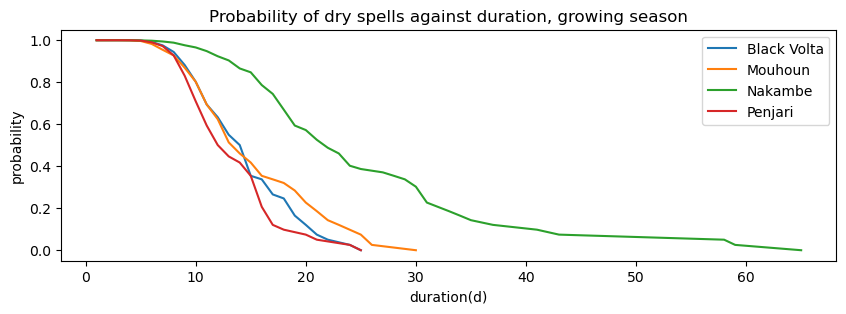

In [39]:
#writing function 
def prob_ex(DF):
    values = DF.value_counts().sort_index()
    d = values.index
    #number of occurence (durations)
    n_occ = np.array(values)
    df_count = pd.DataFrame(columns=["Occurance"], data=values)
    df_count.index = df_count.apply(lambda x: x.name[0], axis=1).values 
    
    n_ex = np.zeros(len(d))
    for i in range(len(d)):
        n_ex[i]= sum(n_occ) - n_occ.cumsum()[i]
    
    #calculate rate of exceedance 
    y = len(Rainfall_sorted_BF.loc[:,'Black_volta'])/365
    r = n_ex/y
    
    #calculate probability of exceedance 
    p = 1 - np.exp(-r)

    df_count['n_ex'] = n_ex
    df_count['r'] = r
    df_count['p'] = p 
    df_count['T'] = 1/df_count['r']
        
    return df_count


#creating the dataframes with occurence and exceedance
BV_DF_gs = prob_ex(DrySpells_BV)
Mou_DF_gs = prob_ex(DrySpells_M)
Nak_DF_gs = prob_ex(DrySpells_N)
Pen_DF_gs = prob_ex(DrySpells_P)

#plotting the probabilities of the dry spells 
plt.figure(figsize=(10,3))
plt.plot(BV_DF_gs.loc[:,'p'], label = 'Black Volta')
plt.plot(Mou_DF_gs.loc[:,'p'], label = 'Mouhoun')
plt.plot(Nak_DF_gs.loc[:,'p'], label = 'Nakambe')
plt.plot(Pen_DF_gs.loc[:,'p'], label = 'Penjari')
plt.title('Probability of dry spells against duration, growing season')
plt.xlabel('duration(d)')
plt.ylabel('probability')
plt.legend();

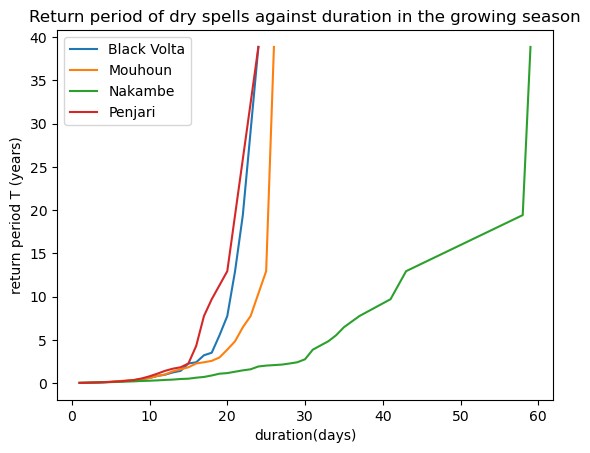

In [40]:
# plotting the return period against the duration
plt.plot(BV_DF_gs.loc[:,'T'], label = 'Black Volta')
plt.plot(Mou_DF_gs.loc[:,'T'], label = 'Mouhoun')
plt.plot(Nak_DF_gs.loc[:,'T'], label = 'Nakambe')
plt.plot(Pen_DF_gs.loc[:,'T'], label = 'Penjari')
plt.title('Return period of dry spells against duration in the growing season')
plt.xlabel('duration(days)')
plt.ylabel('return period T (years)')
plt.legend();

In [41]:
#show datafram of one station
Mou_DF_gs.head()

,Occurance,n_ex,r,p,T
1,320,893.0,22.979766,1.000000,0.043517
2,282,611.0,15.722998,1.000000,0.063601
3,207,404.0,10.396221,0.999969,0.096189
4,117,287.0,7.385434,0.999380,0.135402
5,69,218.0,5.609842,0.996338,0.178258


In [42]:
# return periods 
places = [Pen_DF_gs, Nak_DF_gs, Mou_DF_gs, BV_DF_gs]
return_periods = np.zeros((4,4))
for i, value in enumerate(places):
    for j in np.linspace(10, 40, 4):
        #interpolation to find return periods
        return_periods[i,int((j / 10) - 1)] = np.interp(j,value['T'],value.index)

RP_datfram_gs = pd.DataFrame(index = [10,20,30,40])
RP_datfram_gs.index.name = "return period (yrs)"
RP_datfram_gs['Pen'] = return_periods[0,:].round(2)
RP_datfram_gs['Nak'] = return_periods[1,:].round(2)
RP_datfram_gs['Mou'] = return_periods[2,:].round(2)
RP_datfram_gs['BV'] = return_periods[3,:].round(2)

print(f'Return periods with their corresponding durations in days:')
RP_datfram_gs

Return periods with their corresponding durations in days:


,Pen,Nak,Mou,BV
return period (yrs),,,,
10,18.18,41.18,23.86,20.43
20,21.09,58.03,25.27,22.06
30,22.63,58.54,25.66,23.09
40,24.00,59.00,26.00,24.00


Notes:
- Nakambe (Witte volta) experiences more dry spells. Dry spell of 34 days has a return period of around 5 years. While for Mouhoun a dry spell of 34 days has never happened (return period infinity). 
- Decide for which return period (or probability of exceedance) we want to design the reservoirs.
- example below, 30 years return period:

Example) Durations for a return period of 40 years:
- Mouhoun : between 26 days 
- Nakambe: between 59 days
- Black Volta: between 24 days
- Penjari: between 24 days 

## Dry spells yearly 

Now not only the growing season is taken into account, but the whole year. It will show the duration of dry spells in the dry season (which will be extremely long).

In [43]:
# calculate dry spells
yearlyDrySpells_BV = spells(Rainfall_sorted_BF.loc[:,'Black_volta'], 1, len(Rainfall_data.loc['2017-01-01':'2017-12-01', 'Black_volta']))
yearlyDrySpells_M = spells(Rainfall_sorted_BF.loc[:,'Mouhoun'], 1, len(Rainfall_data.loc['2017-01-01':'2017-12-01', 'Mouhoun']))
yearlyDrySpells_N = spells(Rainfall_sorted_BF.loc[:,'Nakambe'], 1, len(Rainfall_data.loc['2017-01-01':'2017-12-01', 'Nakambe']))
yearlyDrySpells_P = spells(Rainfall_sorted_BF.loc[:,'Penjari'], 1, len(Rainfall_data.loc['2017-01-01':'2017-12-01', 'Penjari']))

In [44]:
#creating the dataframes with occurence and exceedance
BV_DF = prob_ex(yearlyDrySpells_BV)
Mou_DF = prob_ex(yearlyDrySpells_M)
Nak_DF = prob_ex(yearlyDrySpells_N)
Pen_DF = prob_ex(yearlyDrySpells_P)

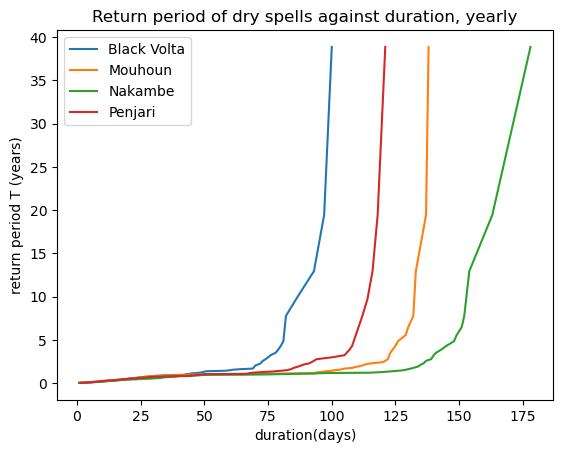

In [45]:
# plotting the return period against the duration
plt.plot(BV_DF.loc[:,'T'], label = 'Black Volta')
plt.plot(Mou_DF.loc[:,'T'], label = 'Mouhoun')
plt.plot(Nak_DF.loc[:,'T'], label = 'Nakambe')
plt.plot(Pen_DF.loc[:,'T'], label = 'Penjari')
plt.title('Return period of dry spells against duration, yearly')
plt.xlabel('duration(days)')
plt.ylabel('return period T (years)')
plt.legend();

In [46]:
# return periods 
places = [Pen_DF, Nak_DF, Mou_DF, BV_DF]
return_periods = np.zeros((4,4))
for i, value in enumerate(places):
    for j in np.linspace(10, 40, 4):
        #interpolation to find return periods
        return_periods[i,int((j / 10) - 1)] = np.interp(j,value['T'],value.index)

RP_datfram = pd.DataFrame(index = [10,20,30,40])
RP_datfram.index.name = "return period (Yrs)"
RP_datfram['Pen'] = return_periods[0,:].round(2)
RP_datfram['Nak'] = return_periods[1,:].round(2)
RP_datfram['Mou'] = return_periods[2,:].round(2)
RP_datfram['BV'] = return_periods[3,:].round(2)

print(f'Return periods with their corresponding durations in days:')
RP_datfram

Return periods with their corresponding durations in days:


,Pen,Nak,Mou,BV
return period (Yrs),,,,
10,114.18,152.86,132.43,86.62
20,118.09,163.44,137.03,97.09
30,119.63,171.16,137.54,98.63
40,121.00,178.00,138.00,100.00


These dry spells happen in de dry season, which declares why they are so extremely long

### Drought indicator: SPI 

In [47]:
def fit(ts, dist='gamma'):
    """
    This function fits a gamma distribution from a number of samples. It can be tested
    whether the process fits a Gamma distribution, because the function exports besides
    the fit parameters alpha and beta both the empirical plotting positions
    (x/(n+1)) and the plotting positions based on the fitted Gamma distribution.
    These can be used to construct goodness of fit or Q-Q plots
    Input:
        samples            : the samples from the process, to be described by
                             the Gamma distribution
    Output:
        alpha              : the shape parameter of the distribution
        loc                : the location (mean) parameter of the distribution
        beta               : the scale parameter of the distribution
        prob_zero          : the probability of zero-rainfall
        plot_pos_emp       : empirical plotting positions
        plot_pos_par       : parameterized plotting positions

    """

    samples = ts.values.flatten()  # flatten the matrix to a one-dimensional array
    # compute probability of zero rainfall
    prob_zero = float(sum(samples == 0)) / len(samples)
    # find the amount of samples
    n = len(samples)
    if dist == 'gamma':
        # select the gamma distribution function to work with
        dist_func = stats.gamma
    elif dist == 'gev':
        # select the generalized extreme value distribution function to work with
        dist_func = stats.genextreme
    # fit parameters of chosen distribution function, only through non-zero samples
    fit_params = dist_func.fit(samples[(samples != 0) & np.isfinite(samples)])
    # following is returned from the function
    return fit_params, prob_zero

def quantile_trans(ts, fit_params, p_zero, dist='gamma'):
    """
    This function detrermines the normal quantile transform of a number of samples, based on
    a known Gamma distribution of the precipitation process (can in principle
    be extended to support grids instead of point values)
    Input:
        samples            : the samples from the process, for which SPI is
                             computed
        alpha              : the shape parameter of the distribution
        loc                : the location (mean) parameter of the distribution
        beta               : the scale parameter of the distribution
        prob_zero          : the probability of zero-rainfall
    Output:
        SPI                : SPI values of the given samples
    """
    # compute probability of underspending of given sample(s), given the predefined Gamma distribution
    samples = ts.values
    # find zero samples
    ii = samples == 0
    # find missings in samples
    jj = np.isnan(samples)
    if dist == 'gamma':
        # select the gamma distribution function to work with
        dist_func = stats.gamma
    elif dist == 'gev':
        # select the gev distribution function to work with
        dist_func = stats.genextreme
    # compute the cumulative distribution function quantile values using the fitted parameters
    cdf_samples = dist_func.cdf(samples, *fit_params)
    # correct for no rainfall probability
    cdf_samples = p_zero + (1 - p_zero) * cdf_samples
    cdf_samples[ii] = p_zero
    cdf_samples[jj] = np.nan
    # compute inverse normal distribution with mu=0 and sigma=1, this yields the SPI value. 
    # Basically this means looking up how many standard deviations the given quantile represents in 
    # a normal distribution with mu=0. and sigma=1.
    SPI = stats.norm.ppf(cdf_samples)
    return SPI

def fit_and_transform(samples, dist='gamma'):
    # The function below fits the samples to the requested distribution 'gamma' or 'gev'
    fit_params, p_zero = fit(samples, dist=dist)
    # Then the fitted parameters are used to estimate the SPI for each invidual month
    spi_samples = quantile_trans(samples, fit_params, p_zero, dist=dist)
    # finally, the spi samples are put into a pandas timeseries again, so that we can easily make time series plots
    # and do further analyses
    return pd.Series(spi_samples, index=samples.index)

def compute_standard_index(ts, index='time.month', dist='gamma'):
    """
    Compute standardised index (e.g. SPI, SPEI). This is done on monthly time series by:
    - grouping the monthly data into monthly bins
    - for each month fit a distribution function (gamma or gev)
    - estimate the probability of exceedance of each point in the time series using the 12 distributions
    - estimate the normal transform of each probability found using mapping to a standard normal distribution
    Input:
        ts: pandas Series object containing monthly data (e.g. monthly precipitation, precip-ref. evaporation)
        index='time.month': index to use for grouping
        dist='gamma': distribution to use. Currently implemented are 'gamma' (default) and 'gev'.
    """
    # first, we group all values per month. So we get a group of January rainfalls, February rainfalls, etc.
    ts_group = ts.groupby(index)
    # for each group, the SPI values are computed and coerced into a new time series. 
    spi = ts_group.apply(fit_and_transform, dist=dist)
    return spi

In [48]:
# resampling montly rainfall data
def monthly(DF):
    P = np.maximum(DF, 0) # converted to mm/day
    P_month = P.resample('M').sum()
    P_month['3month'] = P_month.rolling(3).sum()
    # rename the data
    P_month = P_month.rename(columns={"precipitation":"Pmonth"})
    P_month['12month'] = P_month['Pmonth'].rolling(12).sum()
    return P_month

BV_pmonth = monthly(Rainfall_sorted_BF.loc[:,'Black_volta'])
Mou_pmonth = monthly(Rainfall_sorted_BF.loc[:,'Mouhoun'])
Nak_pmonth = monthly(Rainfall_sorted_BF.loc[:,'Nakambe'])
Pen_pmonth = monthly(Rainfall_sorted_BF.loc[:,'Penjari'])

In [49]:
Mou_pmonth

,Pmonth,3month,12month
Date,,,
1979-01-31,0.00,NaN,NaN
1979-02-28,0.00,NaN,NaN
1979-03-31,16.96,16.96,NaN
1979-04-30,6.50,23.46,NaN
1979-05-31,106.28,129.74,NaN
...,...,...,...
2017-06-30,149.20,285.20,870.13
2017-07-31,217.97,446.44,858.59
2017-08-31,220.91,588.08,841.86


In [50]:
# compute the spi using function and putting it in a dataframe of the four different locations
spi_BV = compute_standard_index(BV_pmonth['Pmonth'], index=BV_pmonth['Pmonth'].index.month)
spi_BV03 = compute_standard_index(BV_pmonth['3month'], index=BV_pmonth['3month'].index.month)
spi_BV12 = compute_standard_index(BV_pmonth['12month'], index=BV_pmonth['12month'].index.month)
BV_pmonth['SPI-01'] = spi_BV
BV_pmonth['spi_BV03'] = spi_BV03
BV_pmonth['spi_BV12'] = spi_BV12

spi_Mou = compute_standard_index(Mou_pmonth['Pmonth'], index=Mou_pmonth['Pmonth'].index.month)
spi_Mou03 = compute_standard_index(Mou_pmonth['3month'], index=Mou_pmonth['3month'].index.month)
spi_Mou12 = compute_standard_index(Mou_pmonth['12month'], index=Mou_pmonth['12month'].index.month)
Mou_pmonth['SPI-01'] = spi_Mou
Mou_pmonth['spi_BV03'] = spi_Mou03
Mou_pmonth['spi_BV12'] = spi_Mou12

'''the nakambe region goes outside the scope of a gamma distribution'''
# spi_Nak = compute_standard_index(Nak_pmonth['Pmonth'], index=Nak_pmonth['Pmonth'].index.month)
# spi_Nak03 = compute_standard_index(Nak_pmonth['3month'], index=Nak_pmonth['3month'].index.month)
# spi_Nak12 = compute_standard_index(Nak_pmonth['12month'], index=Nak_pmonth['12month'].index.month)
# Nak_pmonth['SPI-01'] = spi_Nak
# Nak_pmonth['spi_BV03'] = spi_Nak03
# Nak_pmonth['spi_BV12'] = spi_Nak12

spi_Pen = compute_standard_index(Pen_pmonth['Pmonth'], index=Pen_pmonth['Pmonth'].index.month)
spi_Pen03 = compute_standard_index(Pen_pmonth['3month'], index=Pen_pmonth['3month'].index.month)
spi_Pen12 = compute_standard_index(Pen_pmonth['12month'], index=Pen_pmonth['12month'].index.month)
Pen_pmonth['SPI-01'] = spi_Pen
Pen_pmonth['spi_BV03'] = spi_Pen03
Pen_pmonth['spi_BV12'] = spi_Pen12

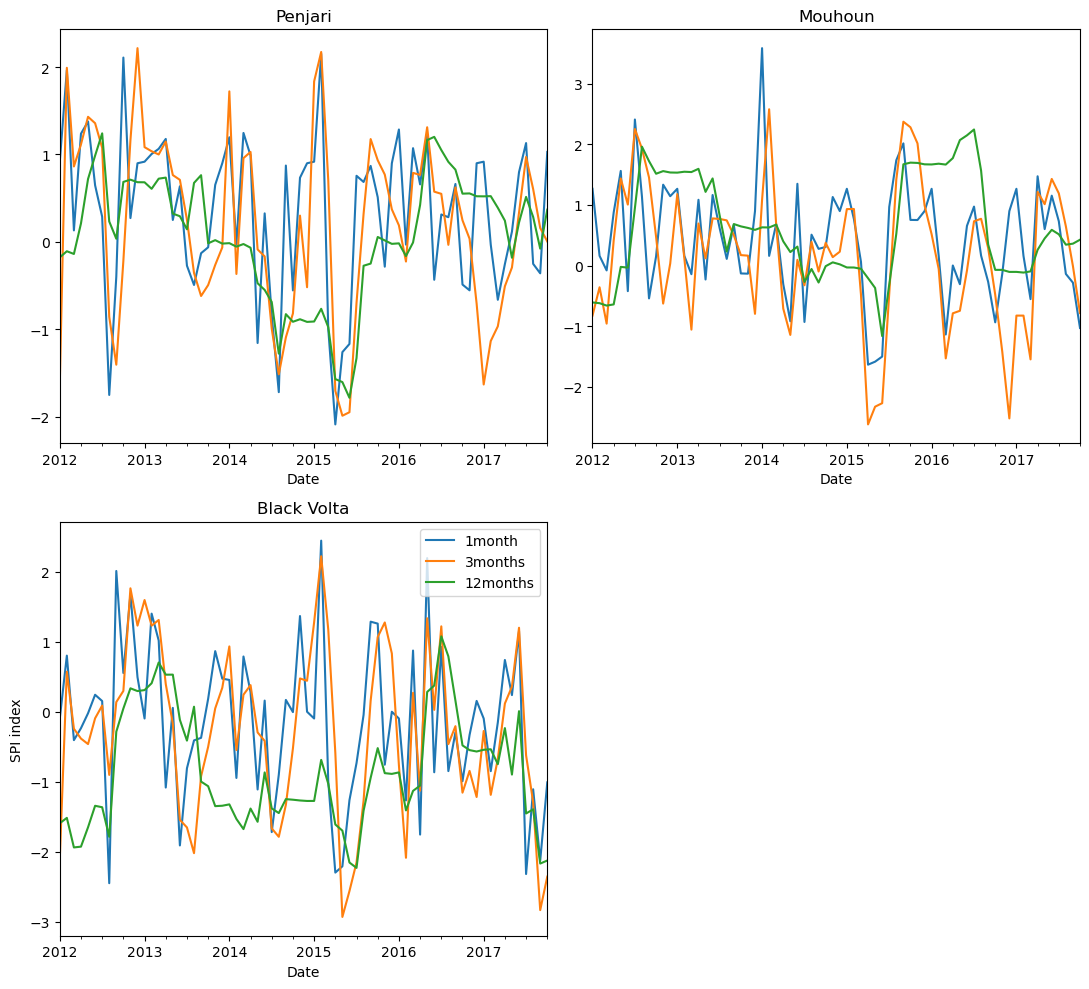

In [51]:
#plotting only Penjari
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
plt.title('Penjari')
Pen_pmonth.loc['2012-01-01':'2017-12-30','SPI-01'].plot(label='1month')
Pen_pmonth.loc['2012-01-01':'2017-12-30','spi_BV03'].plot(label='3months')
Pen_pmonth.loc['2012-01-01':'2017-12-30','spi_BV12'].plot(label='12months')
# plt.subplot(2,2,2)
# plt.title('Nakambe')
# Nak_pmonth.loc['2019-01-01':'2022-12-30','SPI-01'].plot(label='1month')
# Nak_pmonth.loc['2019-01-01':'2022-12-30','spi_BV03'].plot(label='3months')
# Nak_pmonth.loc['2019-01-01':'2022-12-30','spi_BV12'].plot(label='12months')
plt.subplot(2,2,2)
plt.title('Mouhoun')
Mou_pmonth.loc['2012-01-01':'2017-12-30','SPI-01'].plot(label='1month')
Mou_pmonth.loc['2012-01-01':'2017-12-30','spi_BV03'].plot(label='3months')
Mou_pmonth.loc['2012-01-01':'2017-12-30','spi_BV12'].plot(label='12months')
plt.subplot(2,2,3)
plt.title('Black Volta')
BV_pmonth.loc['2012-01-01':'2017-12-30','SPI-01'].plot(label='1month')
BV_pmonth.loc['2012-01-01':'2017-12-30','spi_BV03'].plot(label='3months')
BV_pmonth.loc['2012-01-01':'2017-12-30','spi_BV12'].plot(label='12months')
plt.xlabel('Date')
plt.ylabel('SPI index')
plt.tight_layout()
plt.legend();

Notes: 
- As shown in the graphs, 2012, 2014 and 2015 on yearly basis seemed very dry years. While in 2016 and 2017 the regions experienced barely no drought. 
- On 1 monthly and 3 monthly basis, there seems to be extremely high peaks and lows every year. 
- From this it can be concluded that a solution for the extreme dry periods, can be covered from retaining/storing the rain in the wet period (very high peaks). 